In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import sys
import scipy
import numpy
import json
import bokeh
import tensorflow
import keras
import sklearn
import matplotlib
import pandas as pd
import seaborn as sns

In [4]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!tar xf spark-3.0.0-bin-hadoop3.2.tgz
 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

In [5]:
pip install findspark

In [6]:
import findspark
findspark.init()

In [7]:
import pyspark
sp = pyspark.SparkContext()
print(sp)

<SparkContext master=local[*] appName=pyspark-shell>


In [8]:
namesList = ['hari','sai','pravin','grandhi', 'venkata','sai', 'swathi', 'yamini']
names = sp.parallelize(namesList, 4)

print (names)
names.collect()

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:262


['hari', 'sai', 'pravin', 'grandhi', 'venkata', 'sai', 'swathi', 'yamini']

In [9]:
def rollno(word):
    return ('17pwss - ' +word)

In [10]:
rollnumber = names.map(rollno)
print (rollnumber.collect())

['17pwss - hari', '17pwss - sai', '17pwss - pravin', '17pwss - grandhi', '17pwss - venkata', '17pwss - sai', '17pwss - swathi', '17pwss - yamini']


In [11]:
pairkeynames = names.map(lambda na: (na, 1))
print (pairkeynames.collect())

[('hari', 1), ('sai', 1), ('pravin', 1), ('grandhi', 1), ('venkata', 1), ('sai', 1), ('swathi', 1), ('yamini', 1)]


In [12]:
uniquenames = (names
                       .map(lambda na: (na, 1))
                       .reduceByKey(lambda o,p: o+p)
                       .collect())
print (uniquenames)

[('hari', 1), ('sai', 2), ('grandhi', 1), ('venkata', 1), ('yamini', 1), ('pravin', 1), ('swathi', 1)]


In [13]:
com_list1 = pd.read_csv('com_words.txt')
com_list1 = list(com_list1['stop_words'])
print(com_list1)

['a', "a's", 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', "c'mon", "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'conta

In [14]:
com_list2 = list(map(lambda element: element.capitalize(), com_list1))
print(com_list2)

['A', "A's", 'Able', 'About', 'Above', 'According', 'Accordingly', 'Across', 'Actually', 'After', 'Afterwards', 'Again', 'Against', "Ain't", 'All', 'Allow', 'Allows', 'Almost', 'Alone', 'Along', 'Already', 'Also', 'Although', 'Always', 'Am', 'Among', 'Amongst', 'An', 'And', 'Another', 'Any', 'Anybody', 'Anyhow', 'Anyone', 'Anything', 'Anyway', 'Anyways', 'Anywhere', 'Apart', 'Appear', 'Appreciate', 'Appropriate', 'Are', "Aren't", 'Around', 'As', 'Aside', 'Ask', 'Asking', 'Associated', 'At', 'Available', 'Away', 'Awfully', 'B', 'Be', 'Became', 'Because', 'Become', 'Becomes', 'Becoming', 'Been', 'Before', 'Beforehand', 'Behind', 'Being', 'Believe', 'Below', 'Beside', 'Besides', 'Best', 'Better', 'Between', 'Beyond', 'Both', 'Brief', 'But', 'By', 'C', "C'mon", "C's", 'Came', 'Can', "Can't", 'Cannot', 'Cant', 'Cause', 'Causes', 'Certain', 'Certainly', 'Changes', 'Clearly', 'Co', 'Com', 'Come', 'Comes', 'Concerning', 'Consequently', 'Consider', 'Considering', 'Contain', 'Containing', 'Conta

In [15]:
com_list3 = list(map(lambda element: element.upper(), com_list2))
print(com_list3)

['A', "A'S", 'ABLE', 'ABOUT', 'ABOVE', 'ACCORDING', 'ACCORDINGLY', 'ACROSS', 'ACTUALLY', 'AFTER', 'AFTERWARDS', 'AGAIN', 'AGAINST', "AIN'T", 'ALL', 'ALLOW', 'ALLOWS', 'ALMOST', 'ALONE', 'ALONG', 'ALREADY', 'ALSO', 'ALTHOUGH', 'ALWAYS', 'AM', 'AMONG', 'AMONGST', 'AN', 'AND', 'ANOTHER', 'ANY', 'ANYBODY', 'ANYHOW', 'ANYONE', 'ANYTHING', 'ANYWAY', 'ANYWAYS', 'ANYWHERE', 'APART', 'APPEAR', 'APPRECIATE', 'APPROPRIATE', 'ARE', "AREN'T", 'AROUND', 'AS', 'ASIDE', 'ASK', 'ASKING', 'ASSOCIATED', 'AT', 'AVAILABLE', 'AWAY', 'AWFULLY', 'B', 'BE', 'BECAME', 'BECAUSE', 'BECOME', 'BECOMES', 'BECOMING', 'BEEN', 'BEFORE', 'BEFOREHAND', 'BEHIND', 'BEING', 'BELIEVE', 'BELOW', 'BESIDE', 'BESIDES', 'BEST', 'BETTER', 'BETWEEN', 'BEYOND', 'BOTH', 'BRIEF', 'BUT', 'BY', 'C', "C'MON", "C'S", 'CAME', 'CAN', "CAN'T", 'CANNOT', 'CANT', 'CAUSE', 'CAUSES', 'CERTAIN', 'CERTAINLY', 'CHANGES', 'CLEARLY', 'CO', 'COM', 'COME', 'COMES', 'CONCERNING', 'CONSEQUENTLY', 'CONSIDER', 'CONSIDERING', 'CONTAIN', 'CONTAINING', 'CONTA

In [16]:
com_words = com_list1 + com_list2 + com_list3

In [17]:
file_words = sp.textFile('romeojuliet.txt')
speech_words = file_words.flatMap(lambda x: x.split())
print('File has total of {} words.'.format(file_words.count()))

File has total of 4420 words.


In [18]:
print(speech_words.take(50))

['1595', 'THE', 'TRAGEDY', 'OF', 'ROMEO', 'AND', 'JULIET', 'by', 'William', 'Shakespeare', 'Dramatis', 'Personae', 'Chorus.', 'Escalus,', 'Prince', 'of', 'Verona.', 'Paris,', 'a', 'young', 'Count,', 'kinsman', 'to', 'the', 'Prince.', 'Montague,', 'heads', 'of', 'two', 'houses', 'at', 'variance', 'with', 'each', 'other.', 'Capulet,', 'heads', 'of', 'two', 'houses', 'at', 'variance', 'with', 'each', 'other.', 'An', 'old', 'Man,', 'of', 'the']


In [19]:
output_words = speech_words.filter(lambda x: x not in com_words)
print(output_words)
print(output_words.collect())

PythonRDD[12] at RDD at PythonRDD.scala:53
['1595', 'TRAGEDY', 'ROMEO', 'JULIET', 'William', 'Shakespeare', 'Dramatis', 'Personae', 'Chorus.', 'Escalus,', 'Prince', 'Verona.', 'Paris,', 'young', 'Count,', 'kinsman', 'Prince.', 'Montague,', 'heads', 'houses', 'variance', 'other.', 'Capulet,', 'heads', 'houses', 'variance', 'other.', 'Man,', 'Capulet', 'family.', 'Romeo,', 'son', 'Montague.', 'Tybalt,', 'nephew', 'Lady', 'Capulet.', 'Mercutio,', 'kinsman', 'Prince', 'friend', 'Romeo.', 'Benvolio,', 'nephew', 'Montague,', 'friend', 'Romeo', 'Tybalt,', 'nephew', 'Lady', 'Capulet.', 'Friar', 'Laurence,', 'Franciscan.', 'Friar', 'John,', 'Franciscan.', 'Balthasar,', 'servant', 'Romeo.', 'Abram,', 'servant', 'Montague.', 'Sampson,', 'servant', 'Capulet.', 'Gregory,', 'servant', 'Capulet.', 'Peter,', 'servant', "Juliet's", 'nurse.', 'Apothecary.', 'Musicians.', 'Officer.', 'Lady', 'Montague,', 'wife', 'Montague.', 'Lady', 'Capulet,', 'wife', 'Capulet.', 'Juliet,', 'daughter', 'Capulet.', 'Nurs

In [20]:
frequent_words = (output_words.map(lambda w: (w, 1)).reduceByKey(lambda x,y: x+y))
print(frequent_words.collect())

[('TRAGEDY', 1), ('Shakespeare', 1), ('Dramatis', 1), ('Personae', 1), ('Chorus.', 3), ('Prince', 10), ('young', 15), ('Count,', 1), ('kinsman', 6), ('Montague,', 13), ('houses', 2), ('Capulet', 5), ('Romeo,', 36), ('son', 12), ('nephew', 3), ('Lady', 9), ('Capulet.', 9), ('Friar', 21), ('Laurence,', 1), ('Franciscan.', 2), ('John,', 3), ('Balthasar,', 2), ('Abram,', 1), ('Sampson,', 1), ('Musicians.', 2), ('Officer.', 2), ('daughter', 7), ('Nurse', 3), ('Verona;', 2), ('houses;', 1), ('Torchbearers,', 1), ('Guards,', 1), ('alike', 1), ('dignity,', 1), ('scene,', 1), ('ancient', 8), ('grudge', 1), ('unclean.', 1), ('fatal', 4), ('loins', 1), ('foes', 1), ("star-cross'd", 1), ('life;', 2), ('piteous', 4), ('Doth', 12), ("parents'", 2), ('strife.', 1), ("death-mark'd", 1), ('continuance', 1), ('rage,', 2), ('end,', 3), ('remove,', 1), ('traffic', 1), ('ears', 3), ('attend,', 1), ('strive', 1), ('ACT', 5), ('I.', 11), ('public', 3), ('place.', 4), ('Sampson', 1), ('(with', 1), ('swords', 

In [21]:
print(frequent_words.takeOrdered(10,key=(lambda x: -x[1])))

[('thou', 228), ('Rom.', 163), ('thy', 144), ('Jul.', 117), ('Nurse.', 100), ('thee', 89), ('Enter', 78), ('O,', 67), ('Ben.', 64), ('love', 62)]


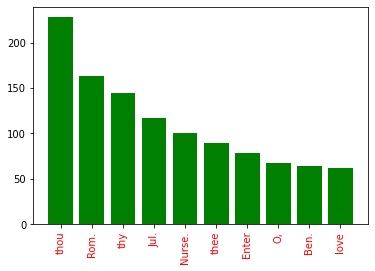

In [32]:
plotter = frequent_words.takeOrdered(10, key=(lambda x: -x[1]))
plot_frame = pd.DataFrame(plotter)


plt.bar(list(range(1,11)), plot_frame[1], color = "green")
plt.xticks(range(1, 11), plot_frame[0], rotation='vertical', color = "red");